<a href="https://colab.research.google.com/github/Ededu1984/Imersao-dados-2019/blob/main/IMERSAO_DADOS_ENEM_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas para analisar os dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import missingno as msno

# ML
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import xgboost as xgb


# Desabilitando warnings
import warnings
warnings.filterwarnings('ignore')



fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
IBGE = "https://github.com/Ededu1984/Heatmap-ENEM-2019/blob/main/IBGE.csv?raw=true"

# 1.0 Lendo dataset

In [ ]:
treino = pd.read_csv(fonte)
ibge = pd.read_csv(IBGE)

In [ ]:
treino.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
ibge.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


# 2.0 Construção do mapa de calor com a distribuição dos inscrito do ENEM 2019 por município

In [ ]:
ibge.set_index('codigo_ibge')

,nome,latitude,longitude,capital,codigo_uf
codigo_ibge,,,,,
5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
5200100,Abadiânia,-16.19700,-48.7057,0,52
3100203,Abaeté,-19.15510,-45.4444,0,31
1500107,Abaetetuba,-1.72183,-48.8788,0,15
...,...,...,...,...,...
2933604,Xique-Xique,-10.82300,-42.7245,0,29
2517407,Zabelê,-8.07901,-37.1057,0,25
3557154,Zacarias,-21.05060,-50.0552,0,35


In [ ]:
treino['CO_MUNICIPIO_RESIDENCIA_'] = treino['CO_MUNICIPIO_RESIDENCIA']

In [ ]:
cidades =ibge.set_index('codigo_ibge').join(treino.set_index('CO_MUNICIPIO_RESIDENCIA'))
cidades.head()

,nome,latitude,longitude,capital,codigo_uf,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,CO_MUNICIPIO_RESIDENCIA_
1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11,1.900010e+11,2019.0,Alta Floresta D'Oeste,11.0,RO,21.0,F,3.0,2.0,1.0,1100015.0,Alta Floresta D'Oeste,11.0,RO,1.0,4.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99999AAEABCECBECDECACCADBBEAEBDCBADCAACEDEBDCE...,ECBAAECCBEADCCECBECCBABBDEDEDCECBBBCAAABDADAE,1.0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,80.0,120.0,80.0,80.0,20.0,380.0,B,B,A,A,6.0,F,A,B,D,B,C,B,B,A,B,B,A,A,B,B,A,D,A,A,B,1100015.0
1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11,1.900011e+11,2019.0,Alta Floresta D'Oeste,11.0,RO,18.0,F,1.0,1.0,1.0,1100015.0,Alta Floresta D'Oeste,11.0,RO,2.0,0.0,2.0,1.0,0.0,11024968.0,1100015.0,Alta Floresta D'Oeste,11.0,RO,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99999EBEBAAAABCAEDEBDAADABECAECBADEDEBDCADCECC...,ACBCDCBCAECAADEACDEBCEBCACCEBDBCECDBADDDBBCDB,1.0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,120.0,160.0,180.0,160.0,780.0,E,G,E,C,6.0,E,A,B,D,B,B,B,A,B,A,A,A,A,B,A,A,E,A,B,B,1100015.0
1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11,1.900011e+11,2019.0,Alta Floresta D'Oeste,11.0,RO,30.0,F,3.0,1.0,1.0,5103403.0,Cuiabá,51.0,MT,1.0,13.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99999ACAADBCBEEEDACBDACECBADDBECBCCAEBBAADABBC...,EAEECEDCAEEBABCCBAACACBDCBDBCBBDDDECBECCDDCAE,1.0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,100.0,120.0,120.0,100.0,560.0,B,B,C,B,4.0,D,A,B,C,B,A,B,A,B,A,B,A,A,B,A,A,D,A,A,B,1100015.0
1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11,1.900020e+11,2019.0,Alta Floresta D'Oeste,11.0,RO,20.0,F,1.0,3.0,1.0,1100015.0,Alta Floresta D'Oeste,11.0,RO,1.0,4.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,B,B,B,2.0,C,A,B,D,A,B,B,B,B,B,A,A,A,A,A,A,D,A,B,B,1100015.0
1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11,1.900020e+11,2019.0,Alta Floresta D'Oeste,11.0,RO,18.0,F,1.0,3.0,1.0,1100015.0,Alta Floresta D'Oeste,11.0,RO,1.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99999DAAAEBBEDEBEAAEBADABAAAEEBDDBAEAEDDBCABCD...,DBACAADEBBEDADBEDAEAEDBECCBCDBEACEDDBCAABDABB,1.0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,120.0,140.0,160.0,80.0,640.0,B,E,C,A,5.0,E,A,B,C,A,B,B,A,B,A,A,A,A,B,A,A,C,A,A,B,1100015.0


In [ ]:
contagem_cidades = cidades['CO_MUNICIPIO_RESIDENCIA_'].value_counts()

In [ ]:
cidades2 = ibge.set_index('codigo_ibge').join(contagem_cidades)

In [ ]:
coordenadas = cidades2[['latitude','longitude','CO_MUNICIPIO_RESIDENCIA_']].dropna()
coordenadas.head()

,latitude,longitude,CO_MUNICIPIO_RESIDENCIA_
codigo_ibge,,,
5200050,-16.75730,-49.4412,14.0
3100104,-18.48310,-47.3916,8.0
5200100,-16.19700,-48.7057,11.0
3100203,-19.15510,-45.4444,13.0
1500107,-1.72183,-48.8788,165.0


In [ ]:
coordenadas = coordenadas.values.tolist()

In [ ]:
mapa_enem = folium.Map(
    width="100%",
    height="100%",
    location=[-15.788497,-47.879873],
    zoom_start=4
)

In [ ]:
mapa_enem.add_child(plugins.HeatMap(coordenadas))
mapa_enem

# 3.0 Avaliando dataframe

## Checando as informações iniciais sobre o dataset

In [ ]:
treino.shape # Checando dimensão do dataframe

(127380, 137)

In [ ]:
treino.columns.values # Checando colunas do dataframe

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [ ]:
treino.describe() # Checando informações estatísticas das colunas

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,CO_MUNICIPIO_RESIDENCIA_
count,1.273800e+05,127380.0,1.273800e+05,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,1.237570e+05,123757.000000,127380.000000,127380.000000,127380.000000,71978.000000,127380.000000,2.862700e+04,2.862700e+04,28627.000000,28627.000000,28627.000000,28627.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,...,127380.0,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,127380.000000,127380.0,127380.0,127380.000000,127380.000000,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,1.273800e+05,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,92758.000000,98043.000000,98043.000000,92758.000000,92758.000000,98043.000000,98043.000000,92758.000000,127380.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,127380.000000,1.273800e+05
mean,1.900035e+11,2019.0,3.086067e+06,30.709389,22.094355,1.076841,2.131198,1.029345,3.058310e+06,30.431103,1.540493,2.961870,1.330515,1.004585,0.120906,3.125412e+07,3.127669e+06,31.120690,2.257764,1.035037,1.005973,0.001099,0.000110,0.000259,0.000377,0.000008,0.001499,0.000479,0.001704,0.000353,0.000055,0.000228,0.000228,0.000659,0.000251,0.000746,0.000047,0.000008,0.001342,0.000039,...,0.0,0.000008,0.000008,0.0,0.000118,0.000016,0.000008,0.0,0.0,0.000079,0.000031,0.000063,0.000008,0.0,0.000047,0.000079,3.088090e+06,30.730735,0.729016,0.771667,0.771667,0.729016,504.508538,508.511745,512.506910,516.509864,477.964015,507.365912,520.463928,523.555206,0.524486,1.136155,120.554859,122.912396,114.901013,121.682323,91.519435,571.570025,3.864068,3.086067e+06
std,1.469535e+06,0.0,9.961399e+05,9.931060,7.498707,0.440671,1.017373,0.202790,9.827584e+05,9.793934,0.716452,4.106733,0.555043,0.067556,0.326019,9.564098e+06,9.600084e+05,9.569764,0.755357,0.183876,0.122273,0.033134,0.010483,0.016094,0.019408,0.002802,0.038694,0.021878,0.041239,0.018792,0.007413,0.015087,0.015087,0.025671,0.015848,0.027299,0.006863,0.002802,0.036615,0.006265,...,0.0,0.002802,0.002802,0.0,0.010851,0.003962,0.002802,0.0,0.0,0.008860,0.005604,0.007925,0.002802,0.0,0.006863,0.008860,9.966122e+05,9.935942,0.445387,0.422110,0.422110,0.445387,1.197953,1.185302,1.163769,1.146852,76.296099,82.972839,64.556578,109.416939,0.499402,0.777411,33.250346,42.786693,40.030347,37.953250,59.380566,188.076455,1.475714,9.961399e+05
min,1.900010e+11,2019.0,1.100015e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100015e+06,11.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100006e+07,1.100015e+06,11.000000,1.00000

## A análise de valores nulos no dataset é importante para verificar o que pode ser removido e se algumas das colunas que tem grande peso na hora de criar o modelo para ML tem valores NaN

In [ ]:
# Checando colunas com valores nulos

todos_valores_nulos = (treino.isnull().sum() / len(treino)) * 100
todos_valores_nulos = round(todos_valores_nulos.drop(todos_valores_nulos[todos_valores_nulos == 0].index).sort_values(ascending=False)[:30],2)
valores_nan = pd.DataFrame({'Porcentagem de valores nulos no dataframe (%)' :todos_valores_nulos})
valores_nan.head(40)

,Porcentagem de valores nulos no dataframe (%)
TP_DEPENDENCIA_ADM_ESC,77.53
TP_LOCALIZACAO_ESC,77.53
CO_ESCOLA,77.53
CO_MUNICIPIO_ESC,77.53
NO_MUNICIPIO_ESC,77.53
CO_UF_ESC,77.53
SG_UF_ESC,77.53
TP_SIT_FUNC_ESC,77.53
TP_ENSINO,43.49
CO_PROVA_CN,27.18


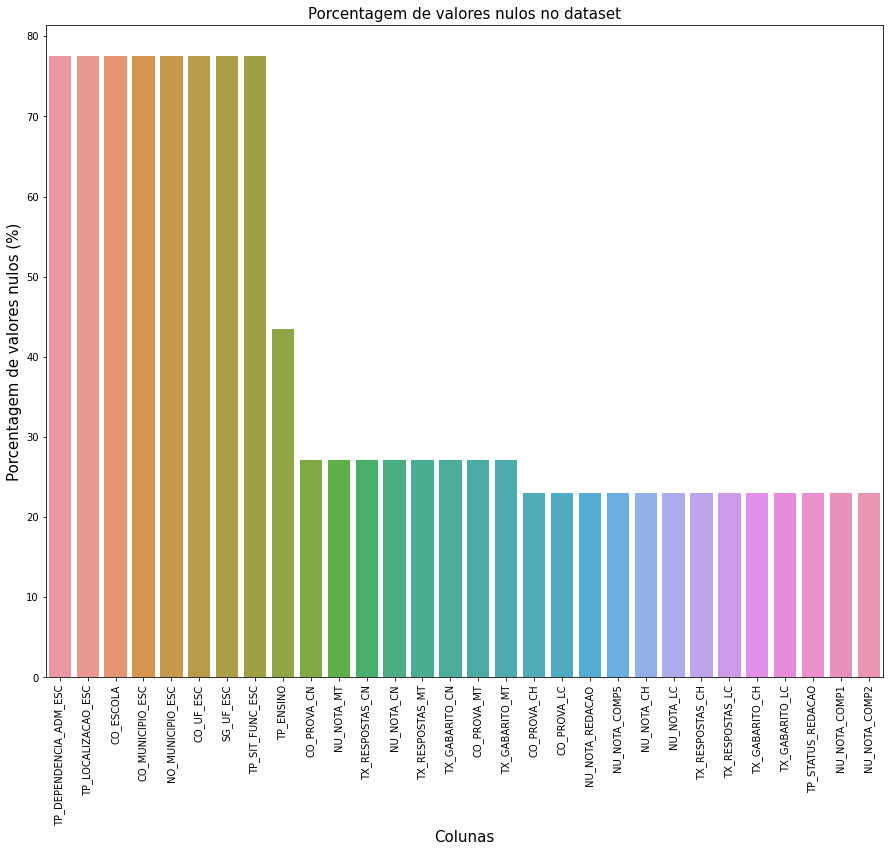

In [ ]:
### Verificando porcentagem de valores nulos

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=todos_valores_nulos.index, y=todos_valores_nulos)
plt.xlabel('Colunas', fontsize=15)
plt.ylabel('Porcentagem de valores nulos (%)', fontsize=15)
plt.title('Porcentagem de valores nulos no dataset', fontsize=15)
plt.show()

<Figure size 576x432 with 0 Axes>

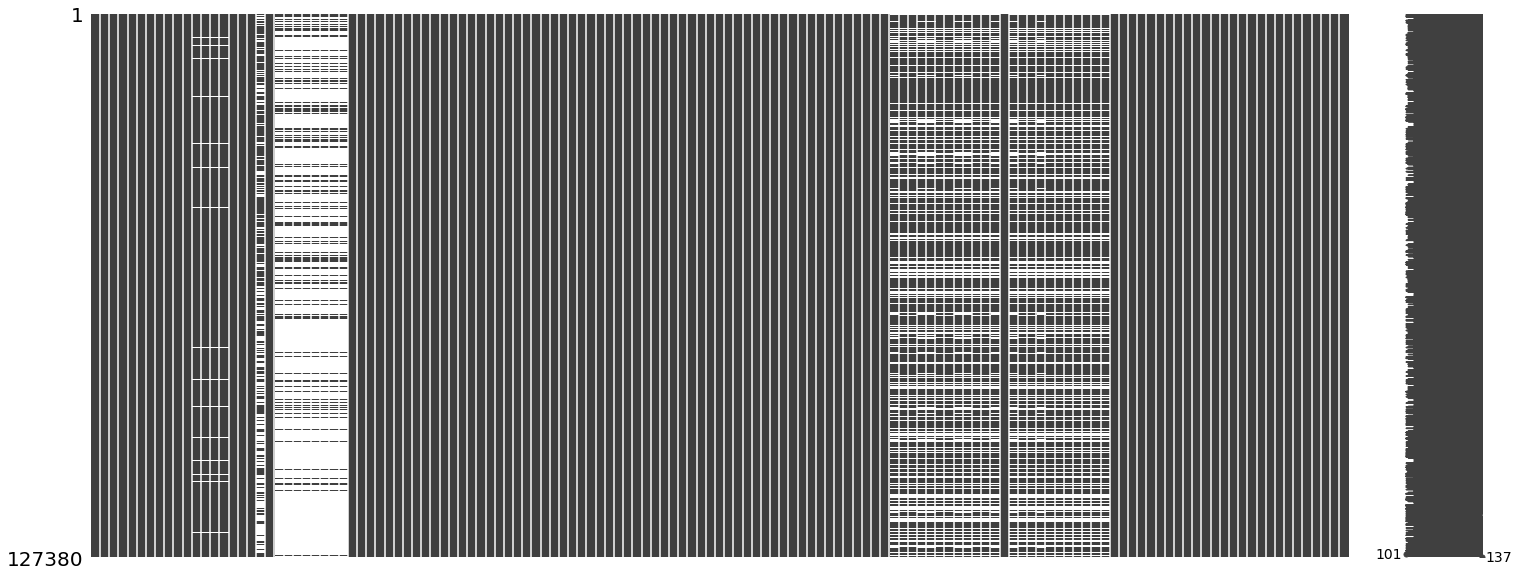

In [ ]:
# Visão geral da distribuição de valores nulos no dataset
## As regiões em braco estão preenchidas com NaN

plt.figure(figsize=(8,6))
msno.matrix(treino)
plt.show()

# 4.0 Adicionando nota total (Feature Engineering)

In [ ]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

In [ ]:
treino['NU_NOTA_TOTAL'] = treino[provas].sum(axis=1)

In [ ]:
notas_sem_zero = treino.query('NU_NOTA_TOTAL > 0')

In [ ]:
notas_sem_zero['NU_NOTA_TOTAL'].describe()

count    98218.000000
mean      2542.394275
std        504.806664
min        220.000000
25%       2267.300000
50%       2545.300000
75%       2861.500000
max       4164.100000
Name: NU_NOTA_TOTAL, dtype: float64

In [ ]:
# Dados estatísticos das notas das provas

treino[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_TOTAL']].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000,127380.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025,1960.346058
std,76.296099,82.972839,109.416939,64.556578,188.076455,1156.509499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000,1388.950000
50%,470.200000,510.900000,501.600000,526.100000,580.000000,2385.450000
75%,533.300000,567.100000,598.200000,565.100000,680.000000,2754.125000
max,797.300000,809.400000,985.000000,801.700000,1000.000000,4164.100000


# 5.0 Construção das funções utilizadas

In [ ]:
def boxplot(df,x,y,x_texto=None,y_texto=None,titulo=None, x_lim=None, y_lim=None):

  plt.style.use("dark_background")  
  ax = sns.boxplot(x=x, y=y, data=df)
  ax.set_xlabel(x_texto, fontsize=16)
  ax.set_ylabel(y_texto, fontsize=16)
  ax.set_xlim(x_lim)
  ax.set_ylim(y_lim)
  plt.title(titulo, fontsize=18)
  #plt.show()

In [ ]:
def histograma(x, titulo=None, x_texto=None, y_texto=None, cor=None, barras=None, grade=False):

  plt.style.use("dark_background")
  plt.figure(figsize = (14, 10))
  plt.hist(x = x, bins=barras, edgecolor='black', alpha=0.3, color=cor)
  plt.title(titulo, fontsize=16)
  plt.grid(grade)
  plt.xlabel(x_texto, fontsize=14)
  plt.ylabel(y_texto, fontsize=14)
  plt.show()


In [ ]:
def histplot(x, titulo=None, x_texto=None, y_texto=None, cor=None, grade=False):

  plt.style.use("dark_background")
  plt.figure(figsize = (14, 10))
  sns.histplot(x = x, edgecolor='black', alpha=0.3, kde=1, color=cor)
  plt.axvline(x=x.mean(), color='red', linestyle='solid', linewidth=2, label="Média")
  plt.axvline(x=x.median(), color='green', linestyle='solid', linewidth=2, label="Mediana")
  plt.axvline(x=x.value_counts().index[0], color='yellow', linestyle='solid', linewidth=2, label="Moda")
  plt.title(titulo, fontsize=16)
  plt.grid(grade)
  plt.xlabel(x_texto, fontsize=14)
  plt.ylabel(y_texto, fontsize=14)
  plt.legend()
  plt.show()

In [ ]:
def barra(x, tipo, titulo=None, grade=None, x_texto=None, y_texto=None):

  plt.style.use("dark_background")
  x.plot(kind=tipo, figsize = (14, 10), edgecolor='black')
  plt.title(titulo, fontsize=16)
  plt.grid(grade)
  plt.xlabel(x_texto, fontsize=14)
  plt.ylabel(y_texto, fontsize=14)
  #plt.show()

# 6.0 Analisando dados da idade dos inscritos

In [ ]:
sorted(treino['NU_IDADE'].unique()) # Checando todas as idades

[13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 75,
 76,
 77,
 82]

In [ ]:
# Checando proporção dos inscritos por idade

porcentagem = round(treino['NU_IDADE'].value_counts() / sum(treino['NU_IDADE'].value_counts()) * 100, 4).sort_index()
porcentagem_df = pd.DataFrame({'Proporção dos inscritos por idade (%)' :porcentagem })
porcentagem_df.head(40)

,Proporção dos inscritos por idade (%)
13,0.0031
14,0.1107
15,1.5772
16,6.1470
17,16.6871
18,16.8409
19,11.3189
20,8.1748
21,5.7050
22,4.6507


In [ ]:
treino['NU_IDADE'].describe() # Checando dados estatísticos da idade dos inscritos

count    127380.000000
mean         22.094355
std           7.498707
min          13.000000
25%          18.000000
50%          19.000000
75%          24.000000
max          82.000000
Name: NU_IDADE, dtype: float64

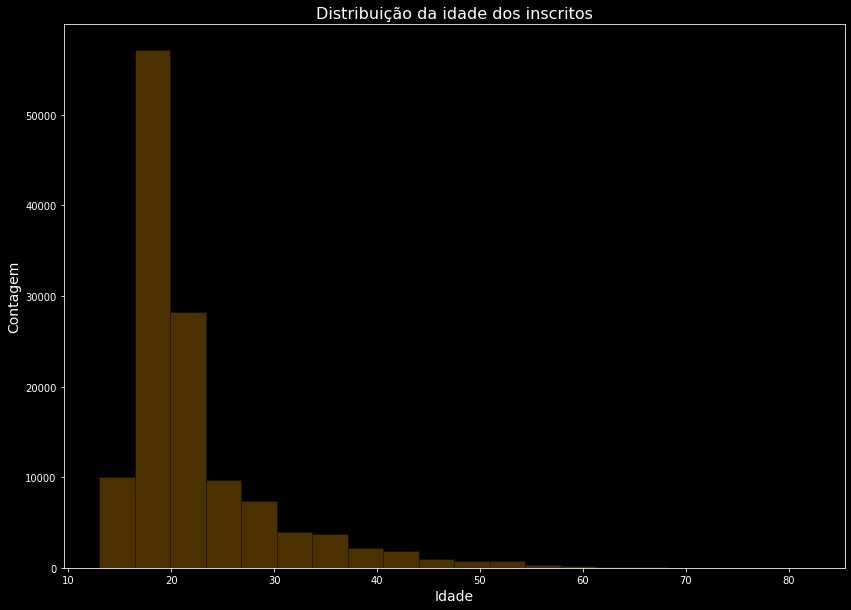

In [ ]:
histograma(x = treino["NU_IDADE"], titulo = "Distribuição da idade dos inscritos", x_texto="Idade", y_texto="Contagem", barras = 20, cor="orange")

# 7.0 Origem dos alunos com 13 anos

In [ ]:
# Estados com os inscritos com 13 anos

inscritos = treino.query('NU_IDADE == 13')
inscritos_13 = list(inscritos['SG_UF_RESIDENCIA'].unique())

print("Os estados dos inscritos com 13 anos são: ", ', '.join(inscritos_13))

Os estados dos inscritos com 13 anos são:  SP, MT, AP, BA


# 8.0 Análise pelo tipo de escola

In [ ]:
treino_escola = treino.copy()
treino_escola.TP_ESCOLA.replace({1:'Não Respondeu', 2:'Pública', 3:'Privada', 4:'Exterior'}, inplace=True)

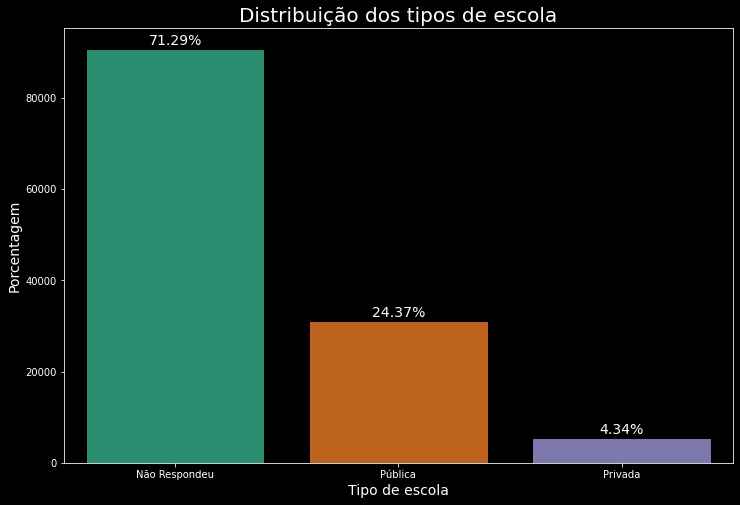

In [ ]:
plt.figure(figsize=(12,8))
count=sns.countplot(treino_escola.TP_ESCOLA, edgecolor='black', palette="Dark2")
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.xlabel('Tipo de escola', fontsize=14)
plt.ylabel('Porcentagem', fontsize=14)
plt.title('Distribuição dos tipos de escola', fontsize=20)
plt.show()

In [ ]:
notas_provas = ['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_TOTAL']
tipo_escola = ['Não Respondeu', 'Pública', 'Privada']
grupo_escola = treino_escola.groupby('TP_ESCOLA').agg('mean')
grupo_escola2 = grupo_escola.loc[tipo_escola, notas_provas]

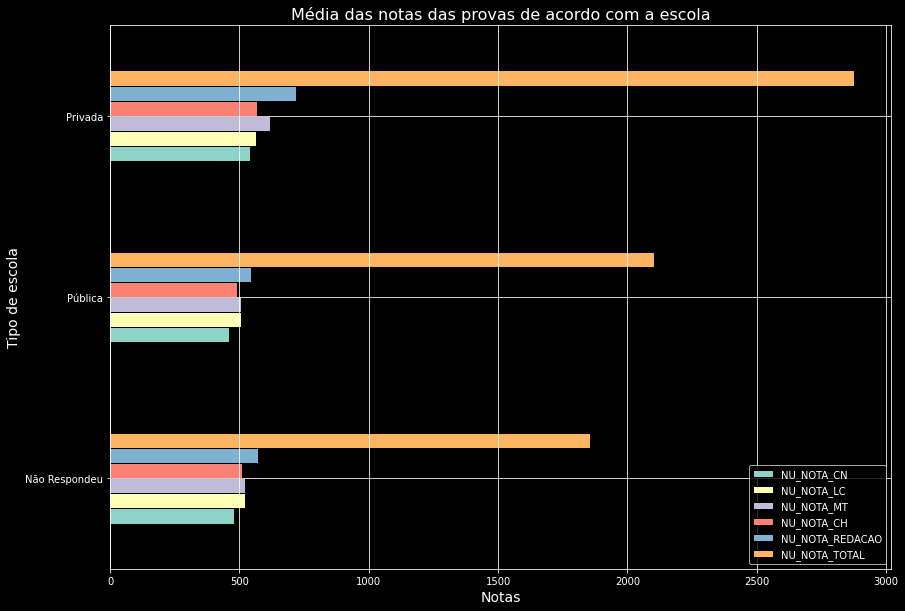

In [ ]:
barra(grupo_escola2, tipo="barh", titulo= "Média das notas das provas de acordo com a escola",x_texto="Notas", y_texto="Tipo de escola")

# 9.0 Comparar distribuições das provas em inglês e espanhol


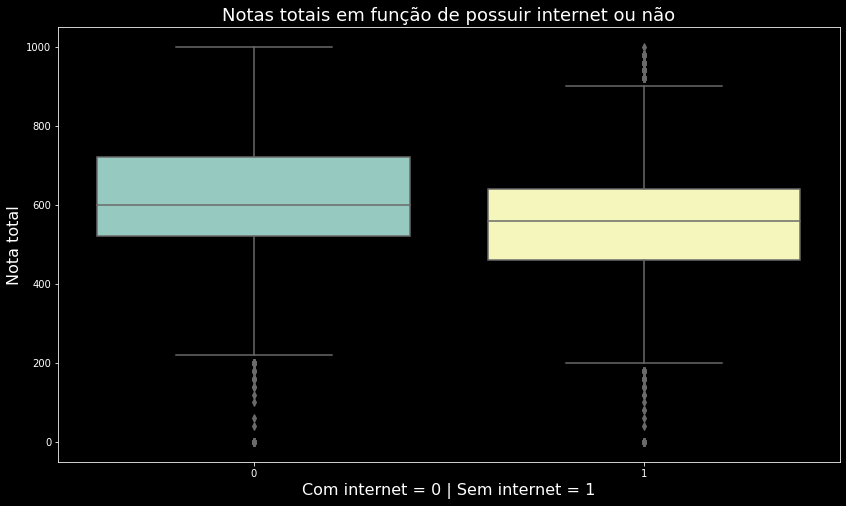

In [ ]:
plt.figure(figsize=(14,8))
boxplot(df = treino, x=treino.TP_LINGUA, y=treino.NU_NOTA_REDACAO, titulo = "Notas totais em função de possuir internet ou não", x_texto = "Com internet = 0 | Sem internet = 1", y_texto="Nota total")

<Figure size 720x720 with 0 Axes>

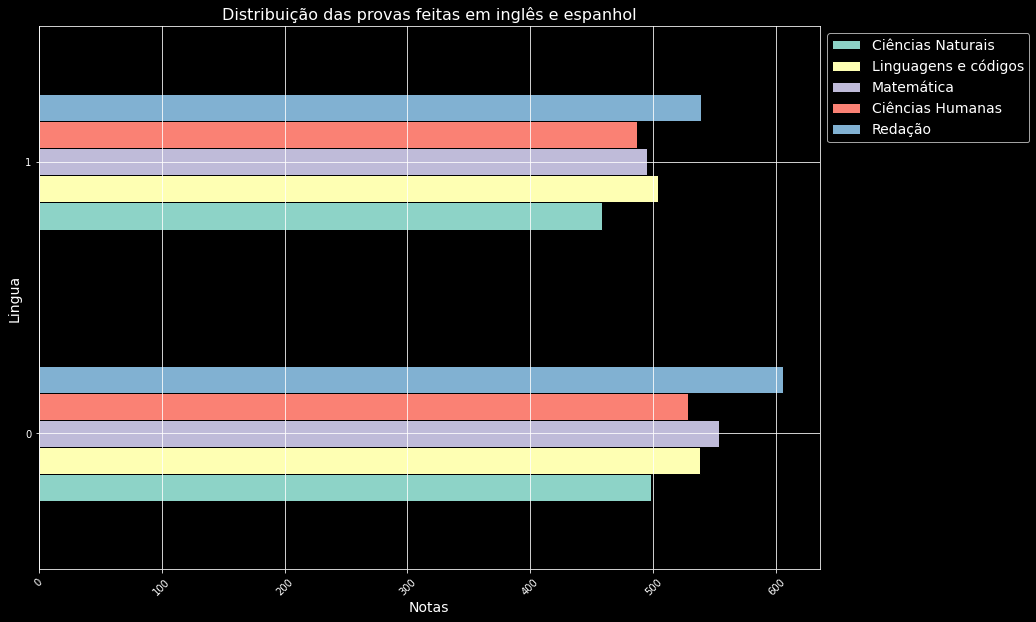

In [ ]:
notas_provas = ['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_CH', 'NU_NOTA_REDACAO']
lingua = [0, 1]
grupo_lingua = treino.groupby('TP_LINGUA').agg('mean')
grupo_lingua2 = grupo_lingua.loc[lingua, notas_provas]


plt.style.use("dark_background")
plt.figure(figsize=(10,10))
grupo_lingua2.plot(kind='barh',figsize=(14,10), edgecolor='black')
plt.legend(['Ciências Naturais', 'Linguagens e códigos', 'Matemática', 'Ciências Humanas', 'Redação'], fontsize=14, bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Distribuição das provas feitas em inglês e espanhol', size=16)
plt.xticks(rotation=45)
plt.xlabel('Notas', fontsize=14)
plt.ylabel('Lingua', fontsize=14)
plt.grid(True)
plt.show()

# 10.0 Avaliando treineiros e não treineiros

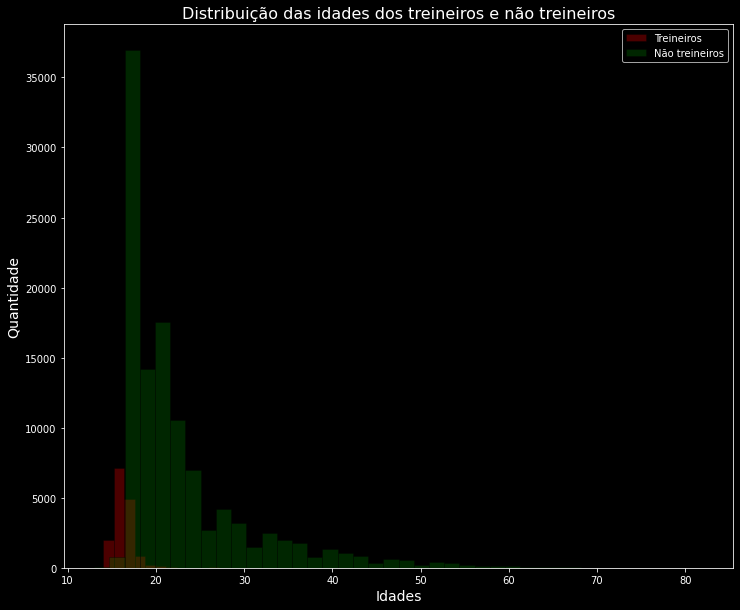

In [ ]:
# Distribuição das idades dos treineiros e não treineiros
## Primeira visualização

# Treineiros
treino.query('IN_TREINEIRO == 1')['NU_IDADE'].hist(bins=40, figsize=(8,8), edgecolor='black', alpha=0.3, color="red")

# Não treineiros
treino.query('IN_TREINEIRO == 0')['NU_IDADE'].hist(bins=40, figsize=(12,10), edgecolor='black', alpha=0.3,  color="green")

plt.style.use("dark_background")
plt.grid(False)
plt.title('Distribuição das idades dos treineiros e não treineiros', fontsize=16)
plt.xlabel('Idades', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.legend(['Treineiros','Não treineiros'])
plt.show()

# 11.0 Avaliação Notas em função da renda familiar

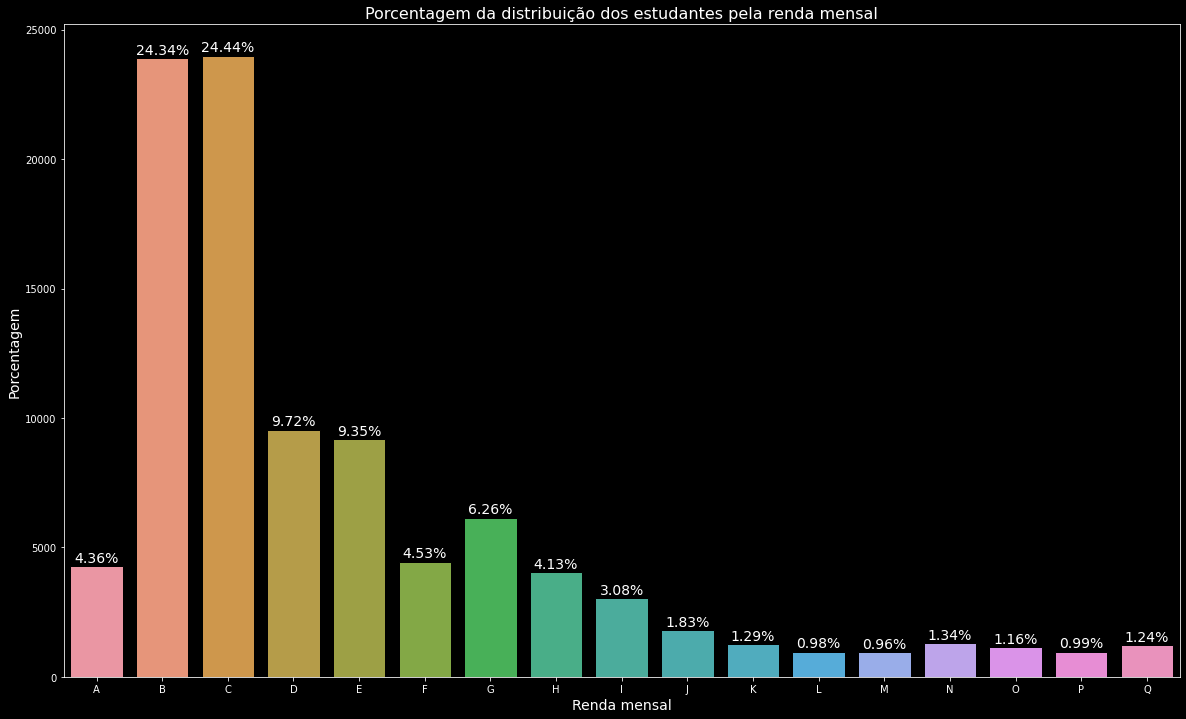

In [ ]:
plt.style.use("dark_background")
plt.figure(figsize=(20,12))
count=sns.countplot(notas_sem_zero['Q006'].sort_values() ,edgecolor = 'black')
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),size=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.title('Porcentagem da distribuição dos estudantes pela renda mensal', size=16)
plt.xlabel('Renda mensal', fontsize=14)
plt.ylabel('Porcentagem', fontsize=14)
plt.show()

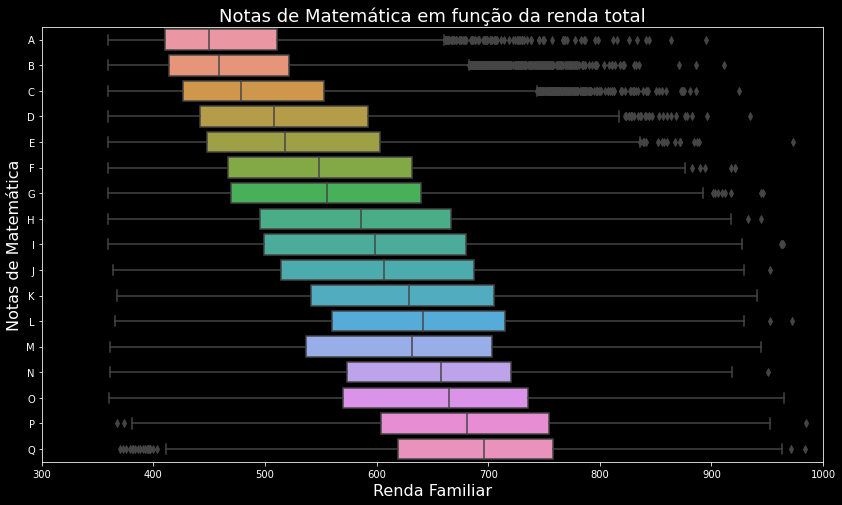

In [ ]:
plt.figure(figsize=(14,8))
boxplot(notas_sem_zero, notas_sem_zero['NU_NOTA_MT'], notas_sem_zero['Q006'].sort_values(), "Renda Familiar", "Notas de Matemática", titulo="Notas de Matemática em função da renda total", x_lim=(300,1000))       

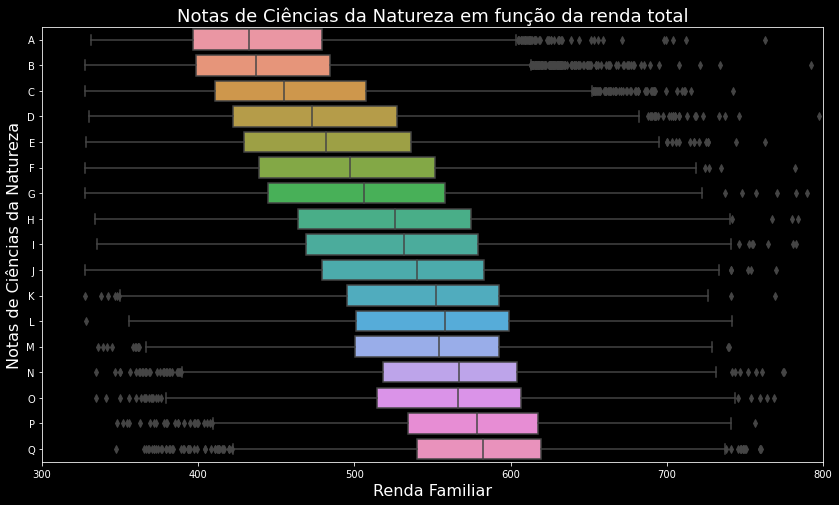

In [ ]:
plt.figure(figsize=(14,8))
boxplot(notas_sem_zero, notas_sem_zero['NU_NOTA_CN'], notas_sem_zero['Q006'].sort_values(), "Renda Familiar", "Notas de Ciências da Natureza", titulo= "Notas de Ciências da Natureza em função da renda total" , x_lim=(300,800))       

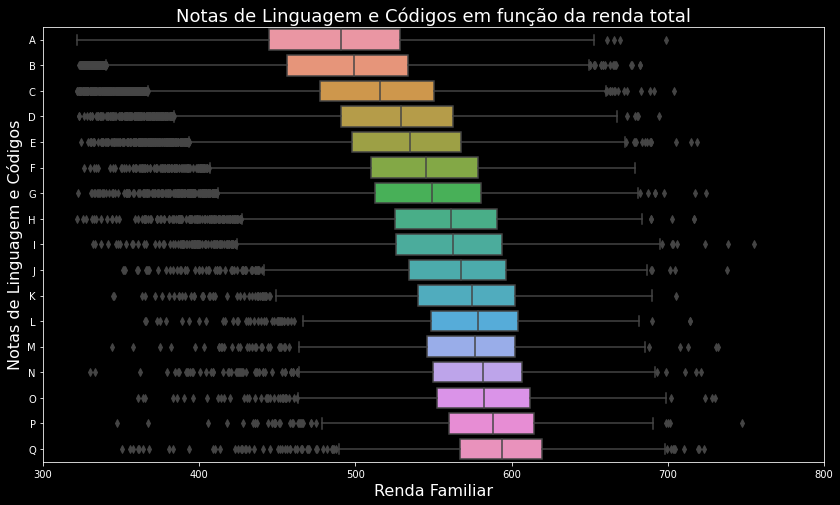

In [ ]:
plt.figure(figsize=(14,8))
boxplot(notas_sem_zero, notas_sem_zero['NU_NOTA_LC'], notas_sem_zero['Q006'].sort_values(), "Renda Familiar", "Notas de Linguagem e Códigos", titulo= "Notas de Linguagem e Códigos em função da renda total" , x_lim=(300,800))      

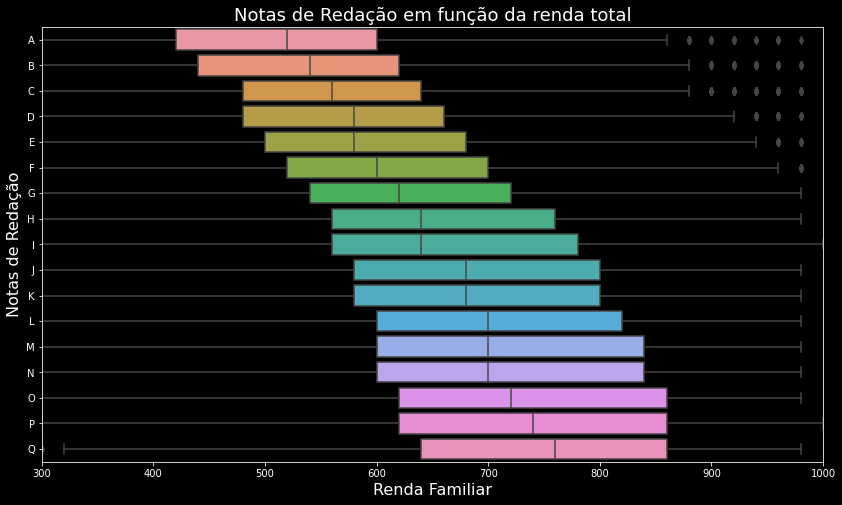

In [ ]:
plt.figure(figsize=(14,8))
boxplot(notas_sem_zero, notas_sem_zero['NU_NOTA_REDACAO'], notas_sem_zero['Q006'].sort_values(), "Renda Familiar", "Notas de Redação", titulo= "Notas de Redação em função da renda total" , x_lim=(300,1000))     

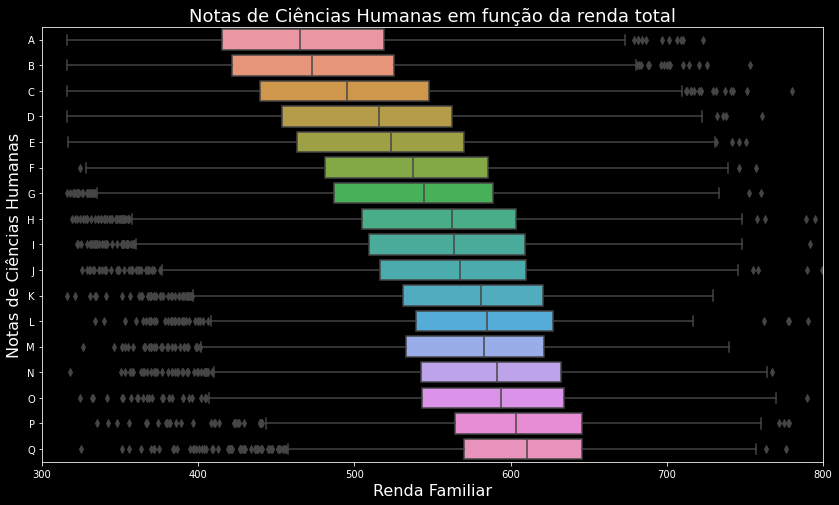

In [ ]:
plt.figure(figsize=(14,8))
boxplot(notas_sem_zero, notas_sem_zero['NU_NOTA_CH'], notas_sem_zero['Q006'].sort_values(), "Renda Familiar", "Notas de Ciências Humanas", titulo= "Notas de Ciências Humanas em função da renda total" , x_lim=(300,800))     

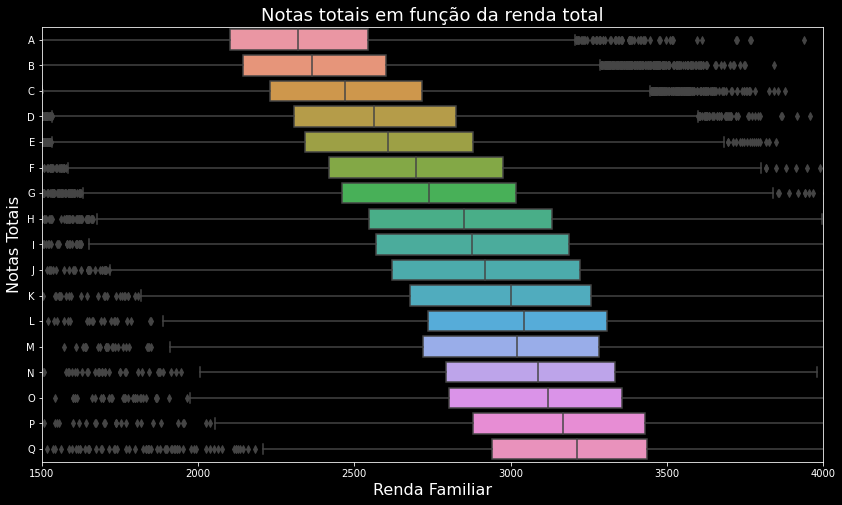

In [ ]:
plt.figure(figsize=(14,8))
boxplot(notas_sem_zero, notas_sem_zero['NU_NOTA_TOTAL'], notas_sem_zero['Q006'].sort_values(), "Renda Familiar", "Notas Totais", titulo= "Notas totais em função da renda total" , x_lim=(1500,4000))       

In [ ]:
treino['NU_NOTA_TOTAL'] = treino[provas].sum(axis=1)

In [ ]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO','NU_NOTA_TOTAL']

In [ ]:
renda_ordenada = treino['Q006'].unique()
renda_ordenada.sort()

In [ ]:
notas_sem_zero = treino.query('NU_NOTA_TOTAL > 0')

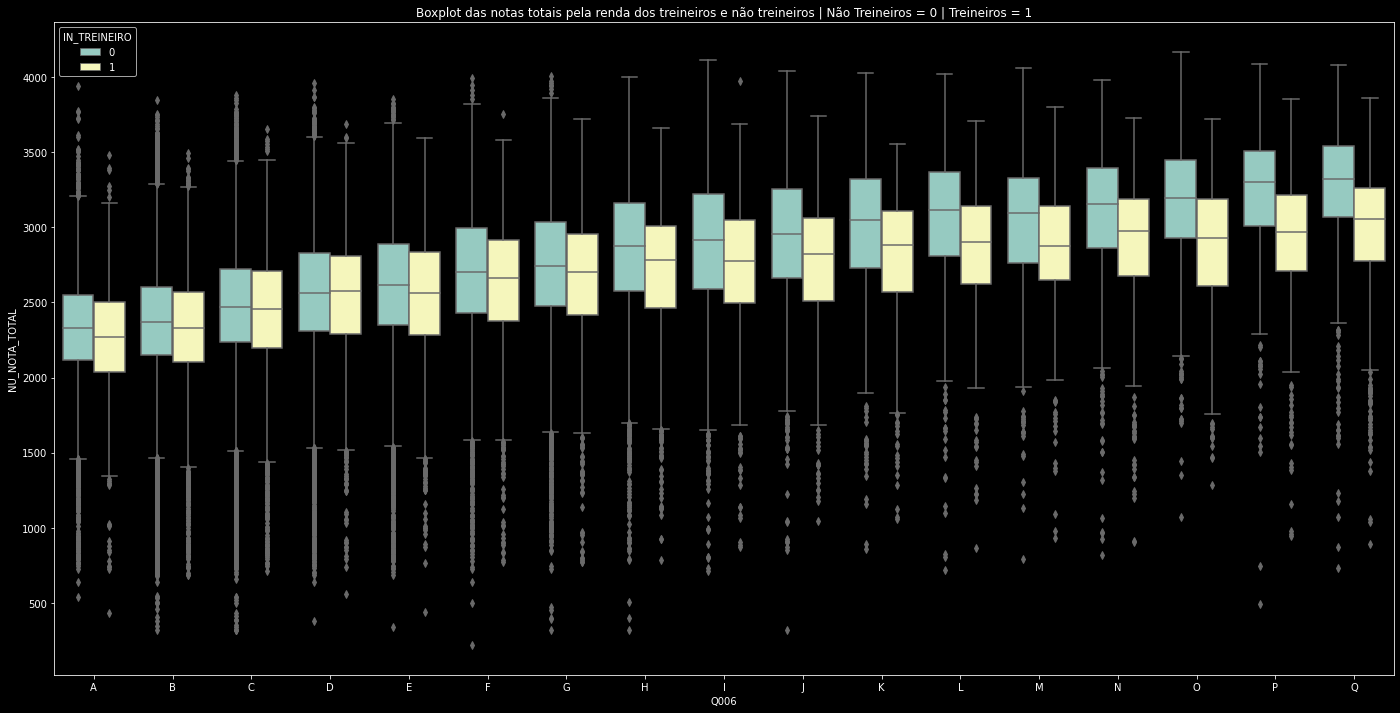

In [ ]:
plt.style.use("dark_background")
plt.figure(figsize=(24,12))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data=notas_sem_zero, 
order = renda_ordenada, hue='IN_TREINEIRO')
plt.title('Boxplot das notas totais pela renda dos treineiros e não treineiros | Não Treineiros = 0 | Treineiros = 1')
plt.show()

# 12.0 Avaliando inscritos pela raça

In [ ]:

grupo_raca = treino.groupby('TP_COR_RACA').NU_NOTA_REDACAO.agg(['max', 'mean'])
grupo_raca

,max,mean
TP_COR_RACA,,
0,980.0,569.615784
1,980.0,607.688785
2,980.0,541.340411
3,1000.0,552.001870
4,980.0,566.856649
5,940.0,483.883162


<Figure size 1008x576 with 0 Axes>

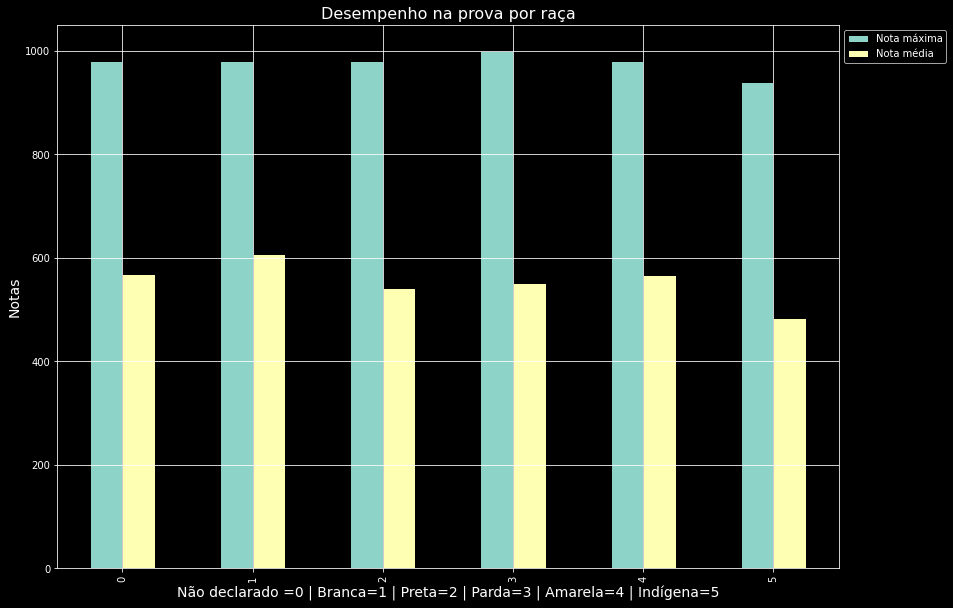

In [ ]:
plt.figure(figsize = (14, 8))
barra(x=grupo_raca, tipo='bar', titulo="Desempenho na prova por raça", x_texto="Não declarado =0 | Branca=1 | Preta=2 | Parda=3 | Amarela=4 | Indígena=5", y_texto="Notas")
plt.legend(['Nota máxima', 'Nota média'], bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

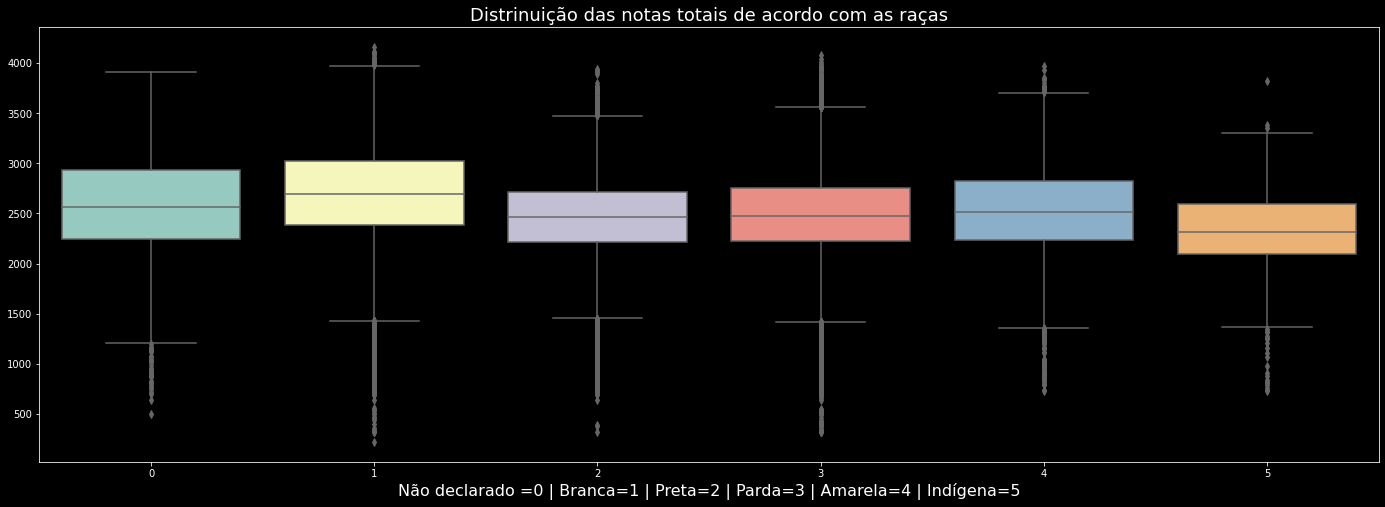

In [ ]:
plt.figure(figsize = (24, 8))
boxplot(df=notas_sem_zero, x=notas_sem_zero['TP_COR_RACA'], y=notas_sem_zero['NU_NOTA_TOTAL'], titulo="Distrinuição das notas totais de acordo com as raças", x_texto="Não declarado =0 | Branca=1 | Preta=2 | Parda=3 | Amarela=4 | Indígena=5")
plt.show()

In [ ]:
contagem_raca = treino.groupby('TP_COR_RACA').NU_NOTA_REDACAO.agg(['count'])
contagem_raca

,count
TP_COR_RACA,
0,1926
1,36245
2,12056
3,44918
4,2316
5,582


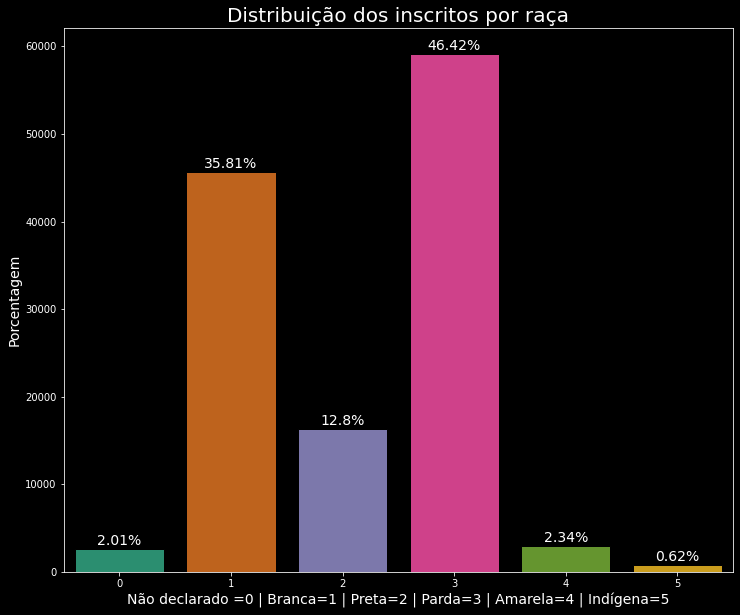

In [ ]:
plt.figure(figsize=(12,10))
count=sns.countplot(treino["TP_COR_RACA"], edgecolor='black', palette="Dark2")
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.xlabel('Não declarado =0 | Branca=1 | Preta=2 | Parda=3 | Amarela=4 | Indígena=5', fontsize=14)
plt.ylabel('Porcentagem', fontsize=14)
plt.title('Distribuição dos inscritos por raça', fontsize=20)
plt.show()


# 13.0 Avaliando notas pelo sexo

In [ ]:
grupo_genero = treino.groupby('TP_SEXO').NU_NOTA_REDACAO.agg(['max', 'mean'])
grupo_genero

,max,mean
TP_SEXO,,
F,1000.0,577.485204
M,980.0,562.833178


<Figure size 1008x576 with 0 Axes>

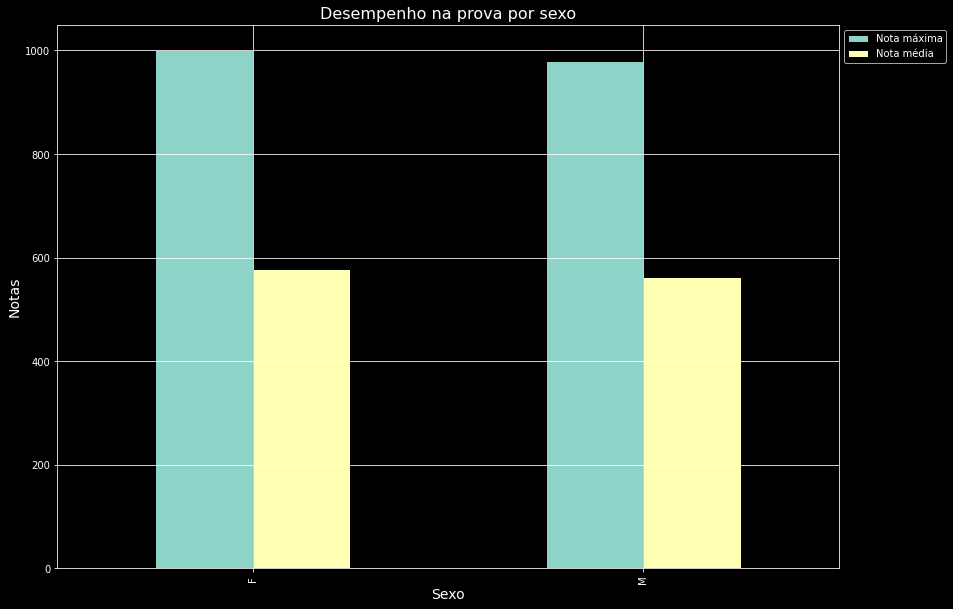

In [ ]:
plt.figure(figsize = (14, 8))
barra(x=grupo_genero, tipo='bar', titulo="Desempenho na prova por sexo", x_texto="Sexo", y_texto="Notas")
plt.legend(['Nota máxima', 'Nota média'], bbox_to_anchor=(1, 1), loc='upper left')
plt.show()



In [ ]:
contagem_sexo = treino.groupby('TP_SEXO').NU_NOTA_REDACAO.agg(['count'])
contagem_sexo

,count
TP_SEXO,
F,58462
M,39581


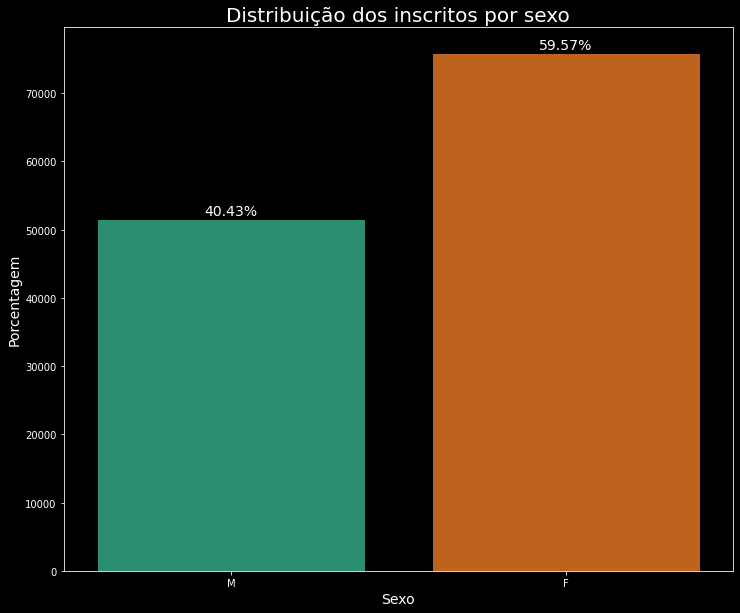

In [ ]:
plt.figure(figsize=(12,10))
count=sns.countplot(treino["TP_SEXO"], edgecolor='black', palette="Dark2")
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Porcentagem', fontsize=14)
plt.title('Distribuição dos inscritos por sexo', fontsize=20)
plt.show()

# 14.0 Alunos fizeram a prova em locais diferentes do de residência

In [ ]:
contagem_dif_cidade = treino.query('CO_MUNICIPIO_RESIDENCIA != CO_MUNICIPIO_PROVA').count()[0]
contagem_mesma_cidade = treino.count()[0] - contagem_dif_cidade

porcentagem_dif_cidade = round(contagem_dif_cidade/contagem_mesma_cidade*100,2)

print('O número de alunos que fez a prova em uma cidade diferente da cidade de residência é {} e equivale a {}%'.format(contagem_dif_cidade,porcentagem_dif_cidade))

O número de alunos que fez a prova em uma cidade diferente da cidade de residência é 21596 e equivale a 20.42%


# 15.0 Verificar se quem zerou a prova foi eliminado ou não estava presente

In [ ]:
faltante = treino.loc[treino['NU_NOTA_TOTAL'] == 0 , ['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_TOTAL']]

## 15.1 No gráfico abaixo toda a região branca simboliza a quatidade de NaN dos campos das notas referentes aos alunos que zeraram. Um pouco abaixo do centro do gráfico existe duas pequenas linhas que simbolizam onde existe valores preenchidos. 
## Esses alunos dessas linhas fizeram somente as provas do primeiro dia do ENEM que são exatamente redação, linguagens e códigos e ciências humanas.

<Figure size 576x432 with 0 Axes>

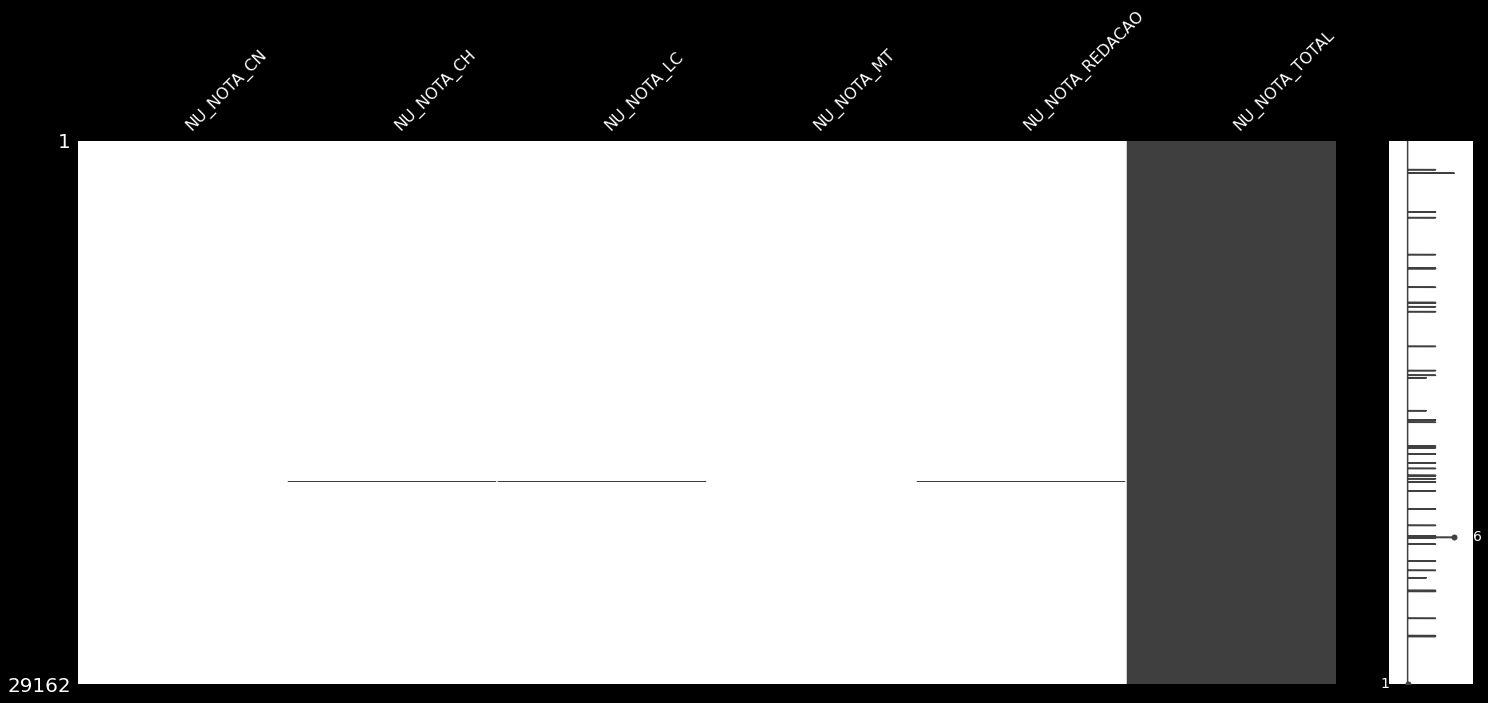

In [ ]:
# Os alunos que tiraram zero na grande maioria não fizeram a prova (prenchidos com Nan)

plt.figure(figsize=(8,6))
msno.matrix(faltante)
plt.show()

In [ ]:
alunos_zerados = treino.loc[treino['NU_NOTA_TOTAL'] == 0 , ['NU_INSCRICAO','NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_TOTAL']]

In [ ]:
alunos_zerados.dropna()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_TOTAL
8693,190001346616,0.0,0.0,0.0,0.0,0.0,0.0
101269,190005050041,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Informações de um dos alunos que zerou a prova

treino.query('NU_INSCRICAO	== 190001346616')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,CO_MUNICIPIO_RESIDENCIA_,NU_NOTA_TOTAL
8693,190001346616,2019,2607901,Jaboatão dos Guararapes,26,PE,44,F,1,3,1,2607901.0,Jaboatão dos Guararapes,26.0,PE,1,11,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,.............................................,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,6.0,0.0,0.0,0.0,0.0,0.0,0.0,B,B,F,F,4,C,A,A,B,A,A,B,B,A,A,A,A,A,B,A,A,E,A,A,B,2607901,0.0


In [ ]:
# Informações de um dos alunos que zerou a prova

treino.query('NU_INSCRICAO	== 	190005050041')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,CO_MUNICIPIO_RESIDENCIA_,NU_NOTA_TOTAL
101269,190005050041,2019,2201903,Bom Jesus,22,PI,24,M,1,2,1,2201903.0,Bom Jesus,22.0,PI,2,0,2,NaN,0,22062670.0,2201903.0,Bom Jesus,22.0,PI,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,.............................................,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,3.0,0.0,0.0,0.0,0.0,0.0,0.0,A,D,C,F,7,B,A,C,C,A,B,B,A,A,A,A,A,A,A,A,A,B,A,A,A,2201903,0.0


# 16.0 Avaliando desistências no ENEM 2019 após primeiro dia

In [ ]:
LC = treino['TP_PRESENCA_LC'].value_counts()
CH = treino['TP_PRESENCA_CH'].value_counts()
MT = treino['TP_PRESENCA_MT'].value_counts()
CN = treino['TP_PRESENCA_CN'].value_counts()

colunas = [0,1]
linhas = ['TP_PRESENCA_LC','TP_PRESENCA_CH', 'TP_PRESENCA_MT', 'TP_PRESENCA_CN']
presenca_total = pd.DataFrame([LC, CH, MT, CN])



grupo_presenca = presenca_total.loc[linhas, colunas]
grupo_presenca

,0,1
TP_PRESENCA_LC,29211,98043
TP_PRESENCA_CH,29211,98043
TP_PRESENCA_MT,34570,92758
TP_PRESENCA_CN,34570,92758


## 13.1 Porcentagem do aumento de ausências do primeiro para o segundo dia de prova

In [ ]:
aumento_faltantes = round((grupo_presenca[0][3] / grupo_presenca[0][1] -1)*100,2)

print("O número de faltantes do primeiro para o segundo dia de prova aumento {}%".format(aumento_faltantes))

O número de faltantes do primeiro para o segundo dia de prova aumento 18.35%


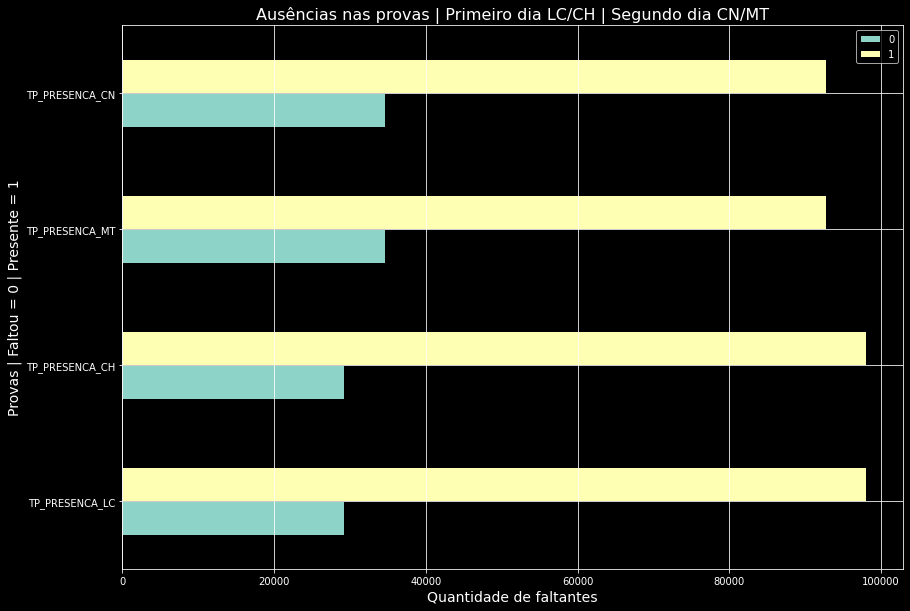

In [ ]:
barra(grupo_presenca, tipo="barh", titulo= "Ausências nas provas | Primeiro dia LC/CH | Segundo dia CN/MT",x_texto="Quantidade de faltantes", y_texto="Provas | Faltou = 0 | Presente = 1")

## Faltantes do segundo dia



In [ ]:
faltantes_CN = treino.query('TP_PRESENCA_CN == 0').shape[0]
faltantes_MT = treino.query('TP_PRESENCA_MT == 0').shape[0]

print('Os inscritos ausentes em ciências da natureza e matemática foram respectivamente {} e {}'.format(faltantes_CN,faltantes_MT))

Os inscritos ausentes em ciências da natureza e matemática foram respectivamente 34570 e 34570


# 17.0 Avaliação dos inscritos quanto a internet e a quantidade de computadores na casa

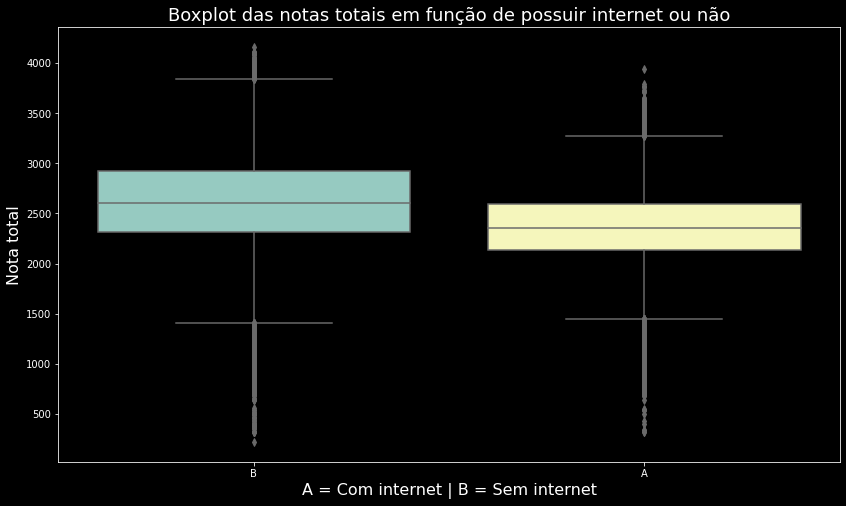

In [ ]:
plt.figure(figsize=(14,8))
boxplot(df=notas_sem_zero , x='Q025', y='NU_NOTA_TOTAL', titulo="Boxplot das notas totais em função de possuir internet ou não", y_texto="Nota total", x_texto="A = Com internet | B = Sem internet")

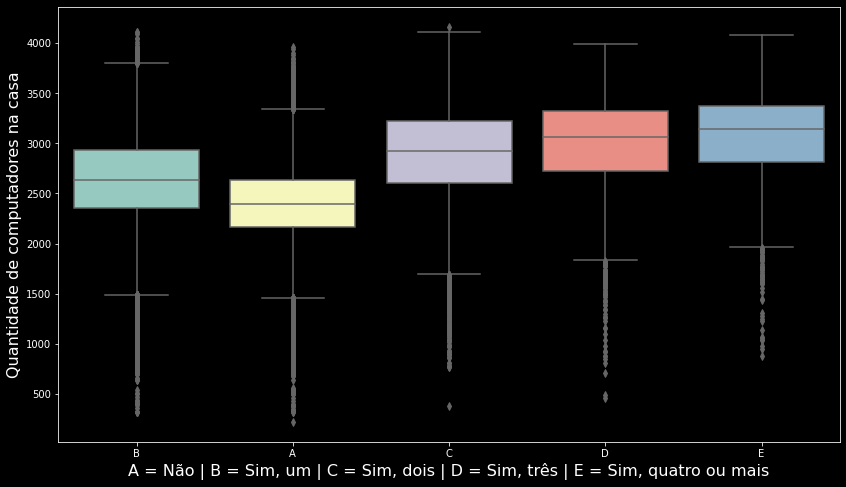

In [ ]:
plt.figure(figsize=(14,8))
boxplot(df=notas_sem_zero, x='Q024', y='NU_NOTA_TOTAL', x_texto="A = Não | B = Sim, um | C = Sim, dois | D = Sim, três | E = Sim, quatro ou mais", y_texto="Quantidade de computadores na casa")

# 18.0 Histogramas das notas

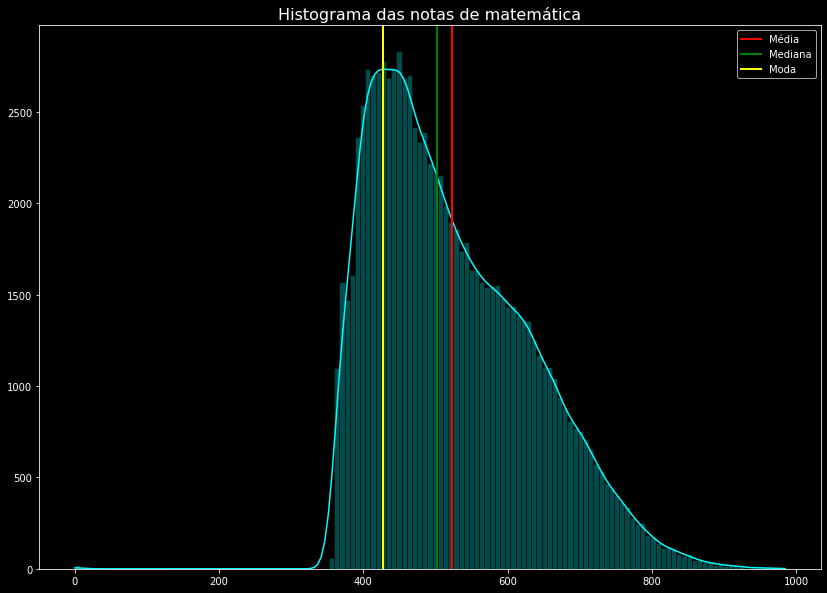

In [ ]:
histplot(x=notas_sem_zero['NU_NOTA_MT'], titulo="Histograma das notas de matemática", cor='cyan')

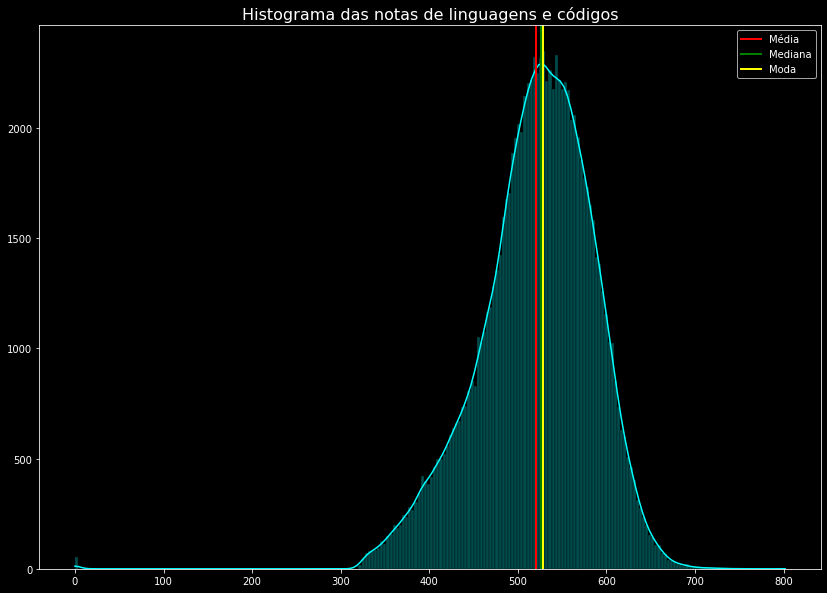

In [ ]:
histplot(x=notas_sem_zero['NU_NOTA_LC'], titulo="Histograma das notas de linguagens e códigos", cor='cyan')

In [ ]:
### No histograma das notas de ciências humanas mesmo a variável notas_sem_zero ter considerado as notas totais maiores que 0, ainda assim, a maior quantidade de notas de ciências naturais foi 0. Neste caso, foram plotados dois histogramas.

notasCH_sem_zero = notas_sem_zero.query('NU_NOTA_CH > 0')
notasCH_sem_zero['NU_NOTA_CH'].value_counts().index[0]

549.7

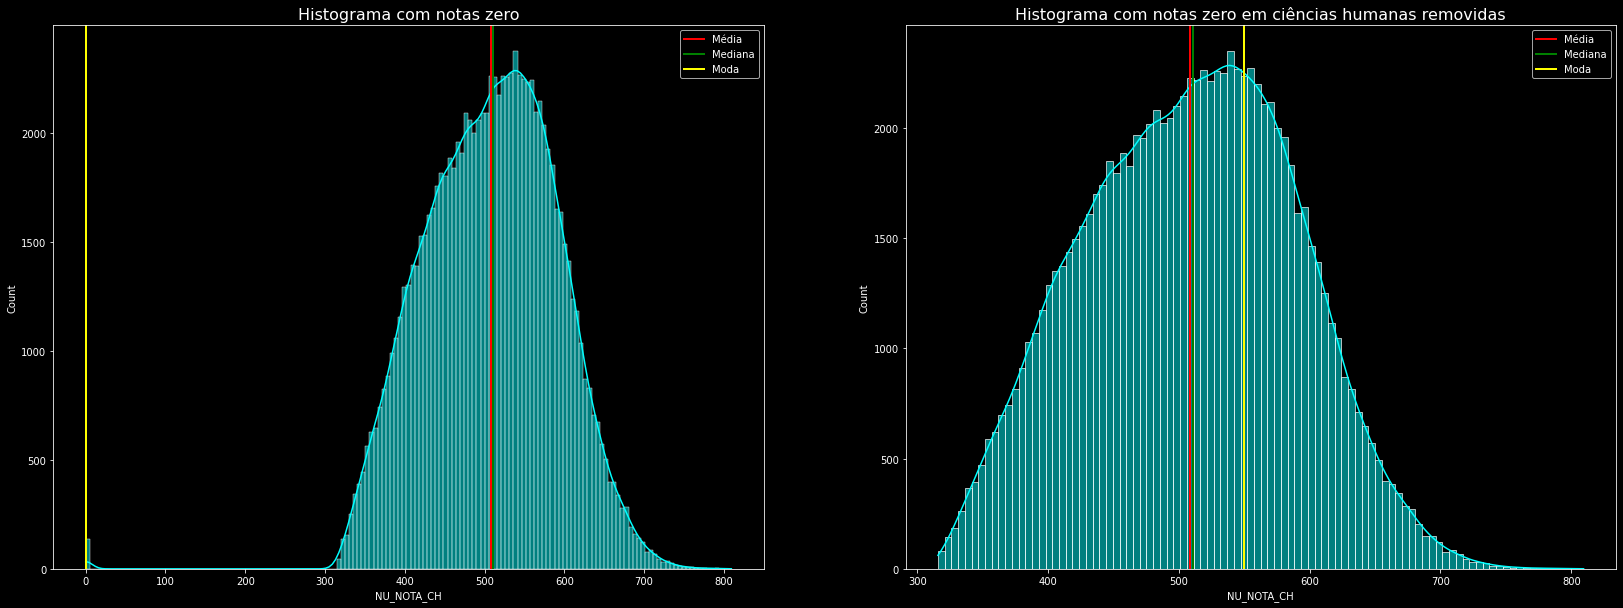

In [ ]:

plt.figure(figsize=(28,10))
plt.subplot(1, 2, 1)
sns.histplot(notas_sem_zero, x='NU_NOTA_CH', kde=1, color='cyan')
plt.title("Histograma com notas zero", fontsize=16)
plt.axvline(notas_sem_zero['NU_NOTA_CH'].mean(), color='red', linestyle='solid', linewidth=2, label="Média")
plt.axvline(notas_sem_zero['NU_NOTA_CH'].median(), color='green', linestyle='solid', linewidth=2, label="Mediana")
plt.axvline(notas_sem_zero['NU_NOTA_CH'].value_counts().index[0], color='yellow', linestyle='solid', linewidth=2, label="Moda")
plt.legend()
#

# Histograma com notas zero em ciências humanas removidas
plt.subplot(1, 2, 2)
sns.histplot(notasCH_sem_zero, x='NU_NOTA_CH', kde=1, color='cyan')
plt.title("Histograma com notas zero em ciências humanas removidas", fontsize=16)
plt.axvline(notasCH_sem_zero['NU_NOTA_CH'].mean(), color='red', linestyle='solid', linewidth=2, label="Média")
plt.axvline(notasCH_sem_zero['NU_NOTA_CH'].median(), color='green', linestyle='solid', linewidth=2, label="Mediana")
plt.axvline(notasCH_sem_zero['NU_NOTA_CH'].value_counts().index[0], color='yellow', linestyle='solid', linewidth=2, label="Moda")
plt.legend()
plt.show()



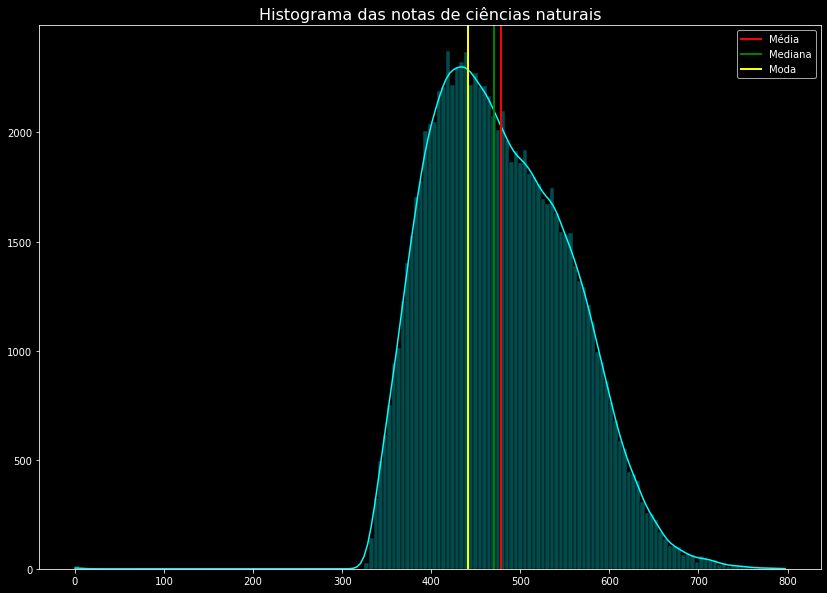

In [ ]:
histplot(x=notas_sem_zero['NU_NOTA_CN'], titulo="Histograma das notas de ciências naturais", cor='cyan')

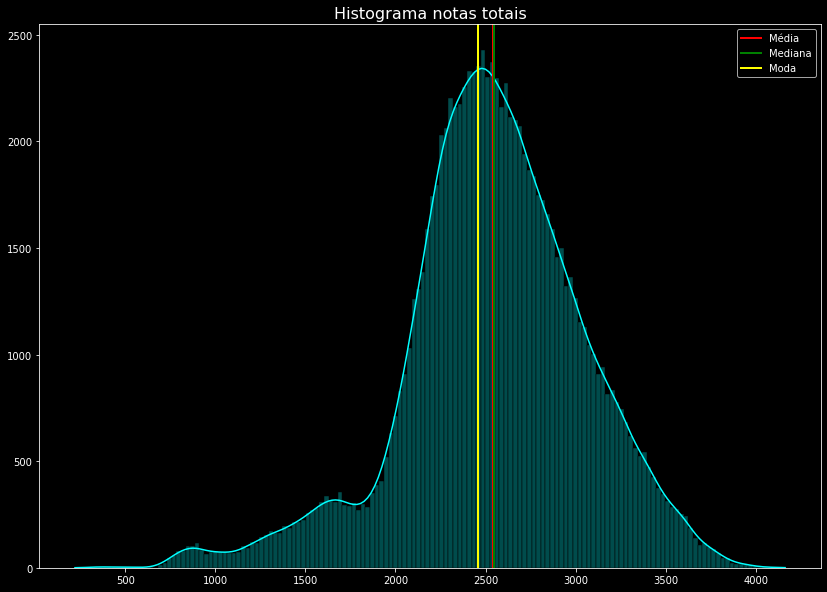

In [ ]:
histplot(x=notas_sem_zero['NU_NOTA_TOTAL'], titulo="Histograma notas totais", cor='cyan')

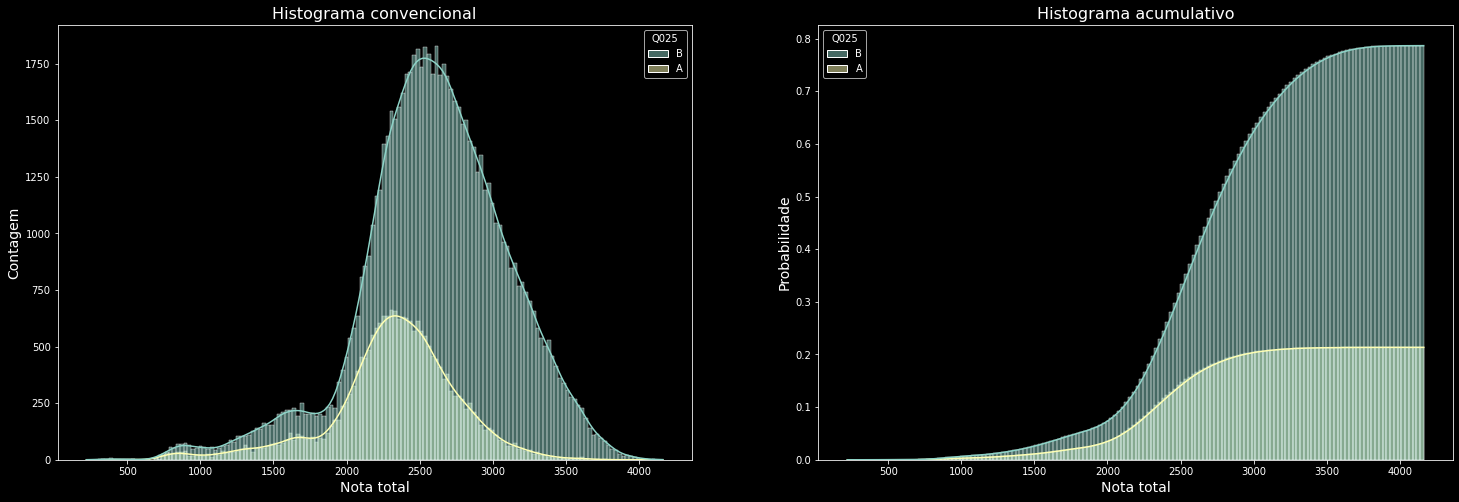

In [ ]:
plt.figure(figsize=(25,8))
plt.subplot(1, 2, 1)
sns.histplot(notas_sem_zero, x='NU_NOTA_TOTAL', hue='Q025', kde=1, color='cyan')
plt.ylabel("Contagem", fontsize=14)
plt.xlabel("Nota total", fontsize=14)
plt.title("Histograma convencional", fontsize=16)
#
plt.subplot(1, 2, 2)
sns.histplot(notas_sem_zero, x='NU_NOTA_TOTAL', hue='Q025', kde=1, stat='probability', cumulative=True, color='yellow')
plt.ylabel("Probabilidade", fontsize=14)
plt.xlabel("Nota total", fontsize=14)
plt.title("Histograma acumulativo", fontsize=16)
plt.show()

# 19.0 Correlações das variáveis

In [ ]:
correlacao = notas_sem_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


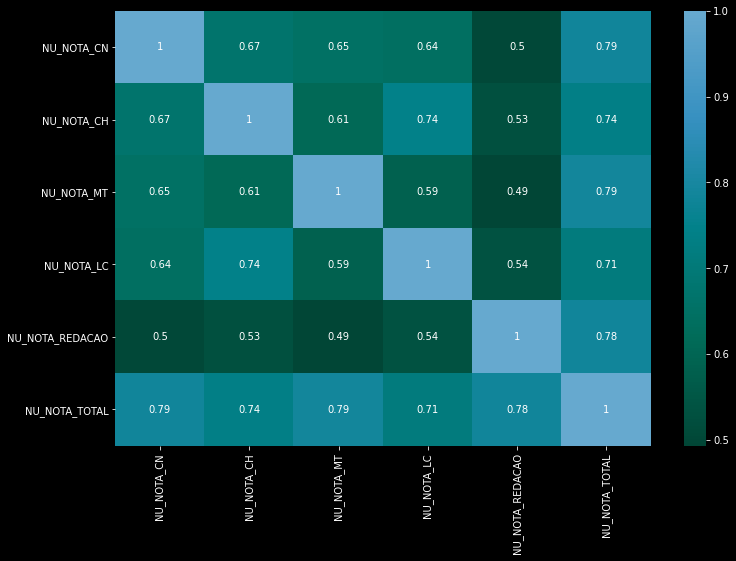

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(correlacao, annot=True, center = 1, cmap="PuBuGn_r")
plt.show()


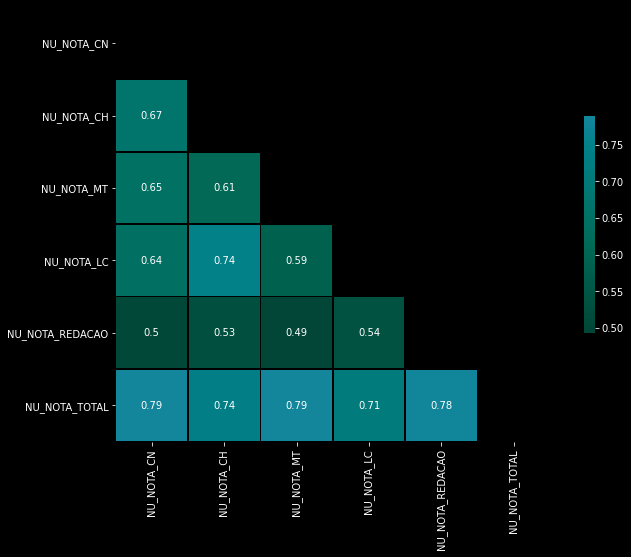

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
mask = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, mask=mask, linecolor ="black", center=1, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap="PuBuGn_r")
plt.show()

# 20.0 Modelos

## Construção do modelo

In [ ]:
novo_treino = notas_sem_zero.copy()

In [ ]:
df = novo_treino[['NU_NOTA_TOTAL', 'NU_NOTA_MT', 'NU_NOTA_LC','NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_REDACAO']]

In [ ]:
(df.isnull().sum() / len(treino))*100

NU_NOTA_TOTAL      0.000000
NU_NOTA_MT         4.290312
NU_NOTA_LC         0.169571
NU_NOTA_CN         4.290312
NU_NOTA_CH         0.169571
NU_NOTA_REDACAO    0.169571
dtype: float64

In [ ]:
df['NU_NOTA_MT'].fillna(df['NU_NOTA_MT'].mean(),inplace=True)
df['NU_NOTA_LC'].fillna(df['NU_NOTA_LC'].mean(),inplace=True)
df['NU_NOTA_CN'].fillna(df['NU_NOTA_CN'].mean(),inplace=True)
df['NU_NOTA_CH'].fillna(df['NU_NOTA_CH'].mean(),inplace=True)
df['NU_NOTA_REDACAO'].fillna(df['NU_NOTA_REDACAO'].mean(),inplace=True)

In [ ]:
(df.isnull().sum() / len(treino))*100

NU_NOTA_TOTAL      0.0
NU_NOTA_MT         0.0
NU_NOTA_LC         0.0
NU_NOTA_CN         0.0
NU_NOTA_CH         0.0
NU_NOTA_REDACAO    0.0
dtype: float64

In [ ]:
y = df["NU_NOTA_TOTAL"].copy()
x = df.drop("NU_NOTA_TOTAL", axis=1)

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Transformando treino e teste para escala entre 0 e 1

sc = StandardScaler()  

## Árvore de decisão

In [ ]:
# Árvore de decisão

dt_reg = DecisionTreeRegressor()


In [ ]:
pipeline_dt = Pipeline([('transformacao', sc), ('estimador', dt_reg)])

In [ ]:
parametros = {
              "estimador__max_depth": [4,5,6],
              "estimador__max_features": ["auto", "sqrt", "log2"],
              "estimador__min_samples_split" : [32, 64, 128],
              "estimador__min_samples_leaf" : [32, 64, 128]
              }
DT = GridSearchCV(pipeline_dt, cv=KFold(n_splits = 5, shuffle=True), param_grid=parametros, scoring='r2')
DT.fit(x_treino, y_treino)
melhor_estimador_DT = DT.best_estimator_

In [ ]:
# Melhor R2 score detectado

DT.best_score_

0.940252799430638

In [ ]:
# melhor estimador

melhor_estimador_DT

Pipeline(memory=None,
         steps=[('transformacao',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimador',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=6, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=32,
                                       min_samples_split=32,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)

In [ ]:
previsoes_DT = DT.predict(x_teste)

In [ ]:
# R2 score - Erro quadrado

acuracia_r2 = r2_score(y_teste, previsoes_DT)
print("A acurácia do algoritmo pela métrica R2 é : {}".format(round(acuracia_r2,4)))

A acurácia do algoritmo pela métrica R2 é : 0.9387


In [ ]:
# RSME - Raiz quadrada do erro médio quadrado 
## MAIOR PENALIDADE PARA ERROS GRANDES
## Mais impactado por outliers

acuracia_rsme = np.sqrt(mean_squared_error(y_teste, previsoes_DT))
print("A acurácia do algoritmo pela métrica RSME é : {}".format(round(acuracia_rsme,4)))

A acurácia do algoritmo pela métrica RSME é : 124.3956


In [ ]:
# MSLE - Raiz quadrada do erro médio logarítmo quadrado
## Não pode ser negativo
## Não se importa com a diferença absoluta, MSLE se importa com a diferença relativa

acuracia_msle = mean_squared_log_error(y_teste, previsoes_DT)
print("A acurácia do algoritmo pela métrica MSLE é : {}".format(round(acuracia_msle,4)))

A acurácia do algoritmo pela métrica MSLE é : 0.0035


## Random Forest

In [ ]:
# Árvore aleatória

rf_reg = RandomForestRegressor()

In [ ]:
pipeline_rf = Pipeline([('transformacao', sc), ('estimador', rf_reg)])

In [ ]:
parametros_rf = {
              "estimador__n_estimators": [100,200,400],
              "estimador__max_depth": [4,5,6]
              }
RF = GridSearchCV(pipeline_rf, cv=KFold(n_splits = 5, shuffle=True), param_grid=parametros_rf, scoring='r2')
RF.fit(x_treino, y_treino)
melhor_estimador_RF = RF.best_estimator_

In [ ]:
# Melhor R2 score detectado

RF.best_score_

0.9616325736900848

In [ ]:
# melhor estimador

melhor_estimador_RF

Pipeline(memory=None,
         steps=[('transformacao',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimador',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=6,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=200, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
previsoes_rf =RF.predict(x_teste)

In [ ]:
# R2 score - Erro quadrado

acuracia_rf_r2 = r2_score(y_teste, previsoes_rf)
print("A acurácia do algoritmo pela métrica R2 é : {}".format(round(acuracia_rf_r2,4)))

A acurácia do algoritmo pela métrica R2 é : 0.9603


In [ ]:
# RSME - Raiz quadrada do erro médio quadrado 
## MAIOR PENALIDADE PARA ERROS GRANDES
## Mais impactado por outliers

acuracia_rf_rsme = np.sqrt(mean_squared_error(y_teste, previsoes_rf))
print("A acurácia do algoritmo pela métrica RSME é : {}".format(round(acuracia_rf_rsme,4)))

A acurácia do algoritmo pela métrica RSME é : 100.1007


In [ ]:
# MSLE - Raiz quadrada do erro médio logarítmo quadrado
## Não pode ser negativo
## Não se importa com a diferença absoluta, MSLE se importa com a diferença relativa

acuracia_rf_msle = mean_squared_log_error(y_teste, previsoes_rf)
print("A acurácia do algoritmo pela métrica MSLE é : {}".format(round(acuracia_rf_msle,4)))

A acurácia do algoritmo pela métrica MSLE é : 0.0024


## SVR

In [ ]:
# SVR

x_treino = sc.fit_transform(x_treino)
x_teste = sc.transform(x_teste)


svr_reg = SVR()
svr_reg.fit(x_treino, y_treino)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
previsoes_SVR = svr_reg.predict(x_teste)

In [ ]:
# R2 score - Erro quadrado

acuracia_SVR_r2 = r2_score(y_teste, previsoes_SVR)
print("A acurácia do algoritmo pela métrica R2 é : {}".format(round(acuracia_SVR_r2,4)))

A acurácia do algoritmo pela métrica R2 é : 0.738


In [ ]:
# RSME - Raiz quadrada do erro médio quadrado 
## MAIOR PENALIDADE PARA ERROS GRANDES
## Mais impactado por outliers

acuracia_SVR_rsme = np.sqrt(mean_squared_error(y_teste, previsoes_SVR))
print("A acurácia do algoritmo pela métrica RSME é : {}".format(round(acuracia_SVR_rsme,4)))

A acurácia do algoritmo pela métrica RSME é : 257.1421


In [ ]:
# MSLE - Raiz quadrada do erro médio logarítmo quadrado
## Não pode ser negativo
## Não se importa com a diferença absoluta, MSLE se importa com a diferença relativa

acuracia_SVR_msle = mean_squared_log_error(y_teste, previsoes_SVR)
print("A acurácia do algoritmo pela métrica MSLE é : {}".format(round(acuracia_SVR_msle,4)))

A acurácia do algoritmo pela métrica MSLE é : 0.0221


## XGBoost

In [ ]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(x_treino, y_treino)

[18:11:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
previsoes_XGB = xgb_reg.predict(x_teste)

In [ ]:
# R2 score - Erro quadrado

acuracia_XGB_r2 = r2_score(y_teste, previsoes_XGB)
print("A acurácia do algoritmo pela métrica R2 é : {}".format(round(acuracia_XGB_r2,4)))

A acurácia do algoritmo pela métrica R2 é : 0.9928


In [ ]:
# RSME - Raiz quadrada do erro médio quadrado 
## MAIOR PENALIDADE PARA ERROS GRANDES
## Mais impactado por outliers

acuracia_XGB_rsme = np.sqrt(mean_squared_error(y_teste, previsoes_XGB))
print("A acurácia do algoritmo pela métrica RSME é : {}".format(round(acuracia_XGB_rsme,4)))

A acurácia do algoritmo pela métrica RSME é : 42.5983


In [ ]:
# MSLE - Raiz quadrada do erro médio logarítmo quadrado
## Não pode ser negativo
## Não se importa com a diferença absoluta, MSLE se importa com a diferença relativa

acuracia_XGB_msle = mean_squared_log_error(y_teste, previsoes_XGB)
print("A acurácia do algoritmo pela métrica MSLE é : {}".format(round(acuracia_XGB_msle,4)))

A acurácia do algoritmo pela métrica MSLE é : 0.0008


# 21.0 Conclusões baseadas na amostra fornecida pela Alura

## Ao longo do projeto foi possível observar a grande influência nas notas totais de algumas características como:

- Renda familiar
- Raça
- Tipo de escola que é uma consequência na maioria das vezes da renda familiar
- Internet e número de computadores na casa que também é um demonstrativo da renda familiar


Neste exame do ENEM houveram mais mulheres inscritas do que homens e as notas das mulheres foram ligeiramente um pouco melhores.

Algo interessante observado foi o número de desistência da prova após o primeiro dia de prova. O aumento de faltantes do primeiro dia de prova para o segundo foi de aproximandamente 18%.

20 % dos inscritos fizeram em uma cidade diferente da cidade de residência.

Nesta amostra apenas 4 alunos com 13 anos fizeram a prova.

Como é possível enxergar no mapa de calor a quantidade de participantes da região norte e centro oeste foi menor visualmente comparado com outras regiões do país.

Quanto aos modelos de Machine Learning, o melhor desempenho foi observado no XGBoost.

Três métricas foram escolhidas:

- R2 score - Erro quadrado

- RSME - Raiz quadrada do erro médio quadrado. Este tipo de métrica tem maior penalidade para error grandes e sofre mais com o impacto dos outliers.

- MSLE Raiz quadrada do erro médio logarítmo quadrado. Este tipo de métrica não se importa com a diferença absoluta, se importa somente com a diferença relativa

No geral pode-se concluir que a desigualdade social é explicitada claramente nos dados e que a mesma é um fator de grande peso no desempenho dos inscritos. Ainda assim, sempre existe outliers que demonstram que mesmo com a desigualdade existe aqueles que conseguem se superar e obter ótimos desempenhos.
